# Downstream analysis - Simulate Gene Intervention (Knock out) 

In [1]:
import pandas as pd
import shutil
import tempfile
import os
from tqdm import tqdm

from functions.analysis_utils.stats.stats_proba import compute_mannwhitneyu_test_means

from functions.analysis_utils.genes_intervention.pers_interventions import tailor_bnd_genes_intervention


from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import compute_phenotype_table


from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import collect_group_data

from functions.analysis import downstream_analysis


from functions.generate_models import generate_models_re, pre_process_re



## Load the data

In [2]:
# Loading the data (TCGA, cell model passport)

annotations_models = pd.read_csv('data/model_list_20250407.csv')
drug_data = pd.read_csv('data/drug_sensitivity.csv')

montagud_original_data_df = (
    pd.read_csv('data/Montagud_inter_nodes_data.csv', header=1)
    .loc[:, ['Target node', 'Interaction type', 'Source']])

nodes_montagud_synonyms = pd.read_csv('data/montagud_models/nodes_processed.csv')



rna_seq_data = pd.read_csv('data/rnaseq_merged/rnaseq_merged_20250117.csv')
cnv_data = pd.read_csv('data/cellmodel_data/cnv_summary_20250207.csv')

proteins_data = pd.read_csv('data/cellmodel_data/proteomics_all_20250211.csv')


models_depmap_annotation = pd.read_csv('data/cellmodel_data/model_list_20250423.csv')

annotations_models = pd.read_csv('data/model_list_20250407.csv')




genes_diff_expressed_data = pd.read_csv('analysis/Pictilisib/genes_models/PI3K_target_block/results/genes_diff_expressed/significant_genes_EGF_ON_Invasion.csv', index_col=0)

/var/folders/83/pqwsm5cn7vscbq8l3fnf30qr0000gn/T/ipykernel_79276/3889436597.py:10: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  nodes_montagud_synonyms = pd.read_csv('data/montagud_models/nodes_processed.csv')


### Users data parameters

In [3]:
drug_interest = 'Pictilisib'
drug_targets = ['PI3K']
type_model = 'genes_models'  # 'genes_models' or 'proteins_models'




genes_to_test = ['CTNNB1', 'CCND1'] # gene that encode cyclin D
number_patients = 35

genetic_intervention = 'KO'


input_interest = 'EGF'
phenotype_interest = 'INVASION'



gene_diff_expr = f'significant_genes_{input_interest}_ON_{phenotype_interest}'

In [4]:
# subdir = f"{'_'.join(drug_targets)}_target_block"
subdir = f"{'_'.join(genes_to_test + [genetic_intervention])}_target_block"


folder_results = f"analysis/{drug_interest}/downstream_analysis/{subdir}/{type_model}"

folder_generic_models = f"analysis/{drug_interest}/downstream_analysis/{subdir}/{type_model}/models/generic"

folder_models = f"analysis/{drug_interest}/downstream_analysis/{subdir}/{type_model}/models_intervention"



dest_dir = f"analysis/{drug_interest}/downstream_analysis/{subdir}/{type_model}/models/generic/"
os.makedirs(dest_dir, exist_ok=True)

# Copy the files
shutil.copy('data/montagud_models/Montagud2022_Prostate_Cancer.bnd', dest_dir)
shutil.copy('data/montagud_models/Montagud2022_Prostate_Cancer.cfg', dest_dir) 



'analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_target_block/genes_models/models/generic/Montagud2022_Prostate_Cancer.cfg'

In [5]:
# models inputs
patients_categ = ['resistant', 'sensitive', 'healthy']

inputs_list = ['EGF', 'FGF', 'TGFb', 'Nutrients', 'Hypoxia', 'Acidosis', 'Androgen', 'TNFalpha', 'SPOP', 'Carcinogen']

# models outputs
phenotype_interest = ["Proliferation","Invasion","DNA_Repair","Apoptosis"]



tissue_interest = 'PAN_CANCER'
tissue_remove = 'Haematopoietic and Lymphoid'




In [6]:
top_resistant_ids, top_sensitive_ids, top_healthy_ids, montagud_node_model, rna_seq_data_models_filtered, cnv_data_filtered, df_melted_protein = pre_process_re(
    montagud_original_data_df,
    nodes_montagud_synonyms,
    rna_seq_data,
    cnv_data,
    number_patients,
    drug_data,
    annotations_models,
    drug_interest,
    proteins_data,
    type_model,
    tissue_interest=None,
    tissue_remove=None,
)

/Users/romane/repos/icr/Attractor-Resistance/functions/generate_utils/identification_patients/get_patients_sens_res.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations_models_filtered.rename(


Gene intervention = gene of interest 

In [7]:
# # simulate a knockin of the gene 
generate_models_re(
    folder_generic_models,
    folder_models,
    top_resistant_ids,
    top_sensitive_ids,
    top_healthy_ids,
    drug_interest,
    drug_targets,
    phenotype_interest,
    rna_seq_data_models_filtered,
    montagud_node_model,
    cnv_data_filtered,
    type_model,
    df_melted_protein,
    amplif_factor = 100,
    intervention_gene=None,
    genetic_intervention=genes_to_test,
)

All .cfg and .bnd files created for sensitive, resistant and healthy patients.
Modified and saved: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_target_block/genes_models/models_intervention/resistant/pers_models/SIDM00223_Pictilisib.cfg
Modified and saved: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_target_block/genes_models/models_intervention/resistant/pers_models/SIDM00832_Pictilisib.cfg
Modified and saved: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_target_block/genes_models/models_intervention/resistant/pers_models/SIDM01078_Pictilisib.cfg
Modified and saved: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_target_block/genes_models/models_intervention/resistant/pers_models/SIDM00835_Pictilisib.cfg
Modified and saved: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_target_block/genes_models/models_intervention/resistant/pers_models/SIDM00255_Pictilisib.cfg
Modified and saved: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_

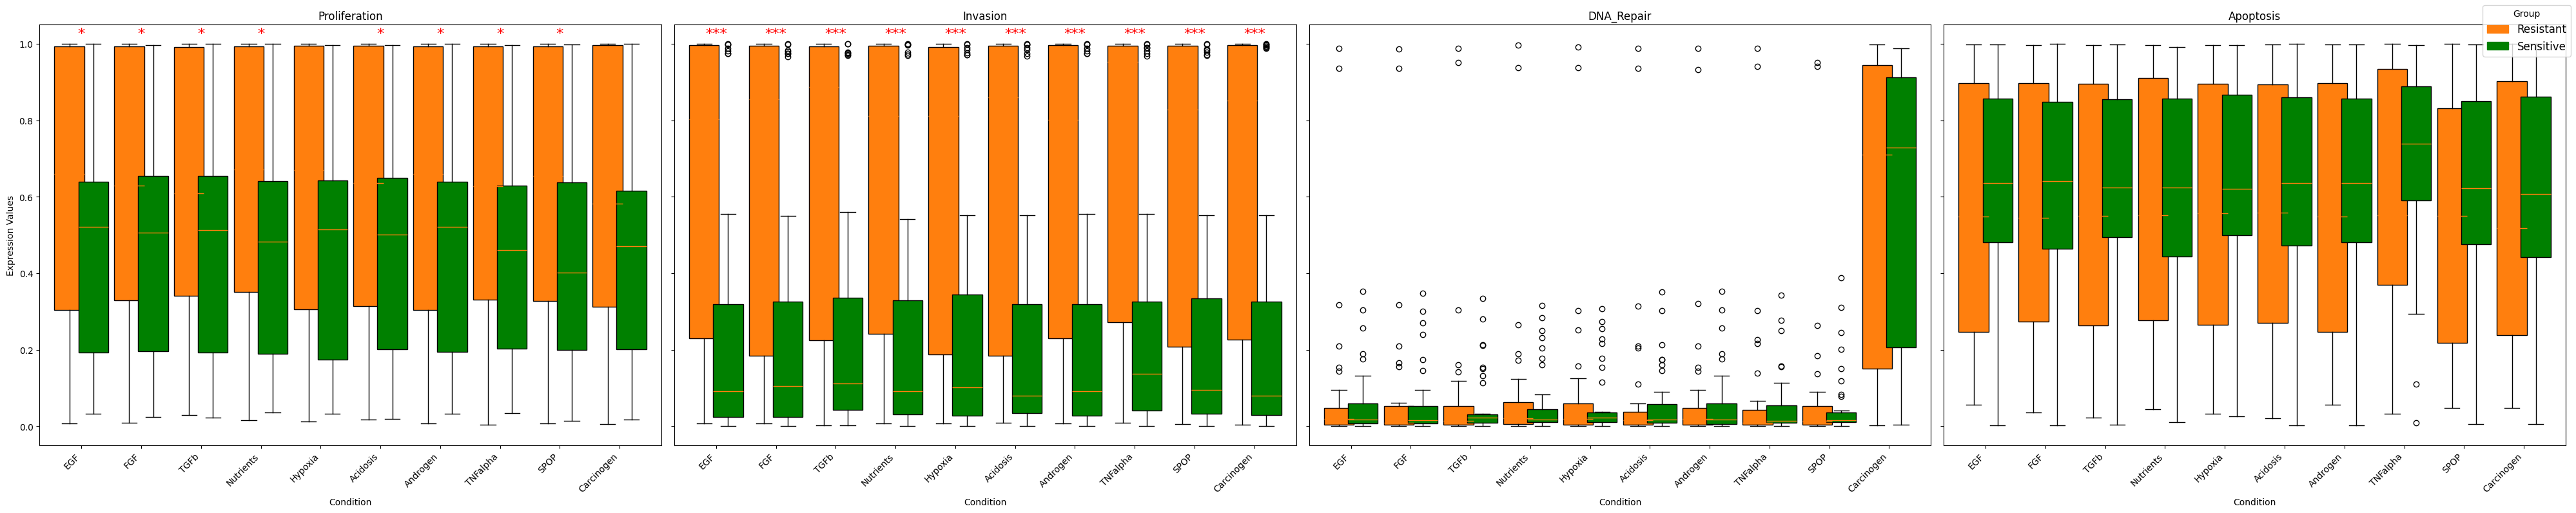

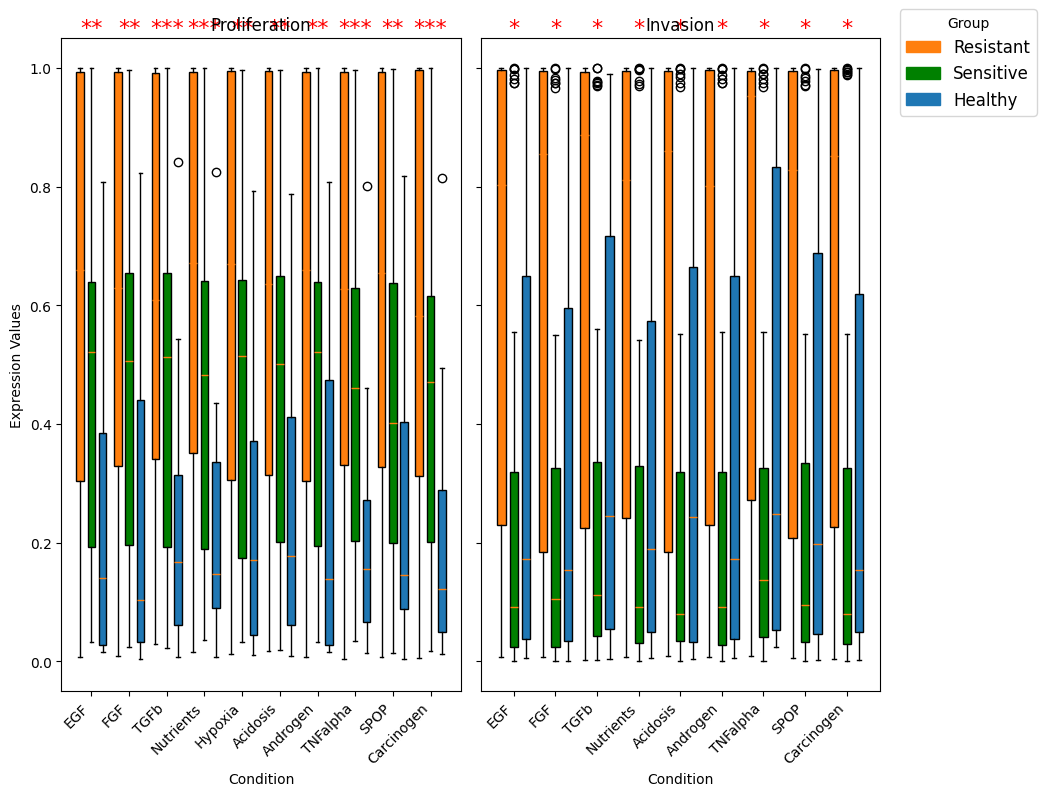

/Users/romane/repos/icr/Attractor-Resistance/functions/analysis_utils/MaBoSS_simulation/maboss_phenotype_patient.py:262: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  patient_mean.loc[condition][phenotype] = mean
/Users/romane/repos/icr/Attr

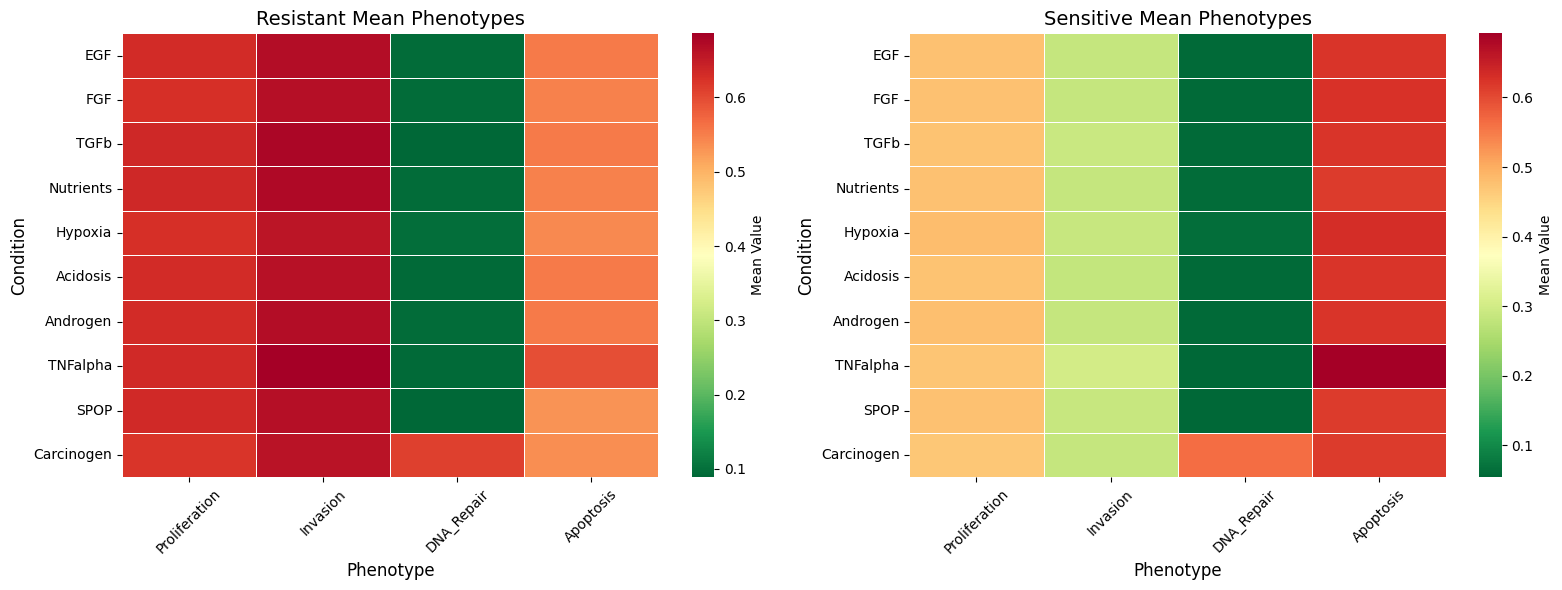

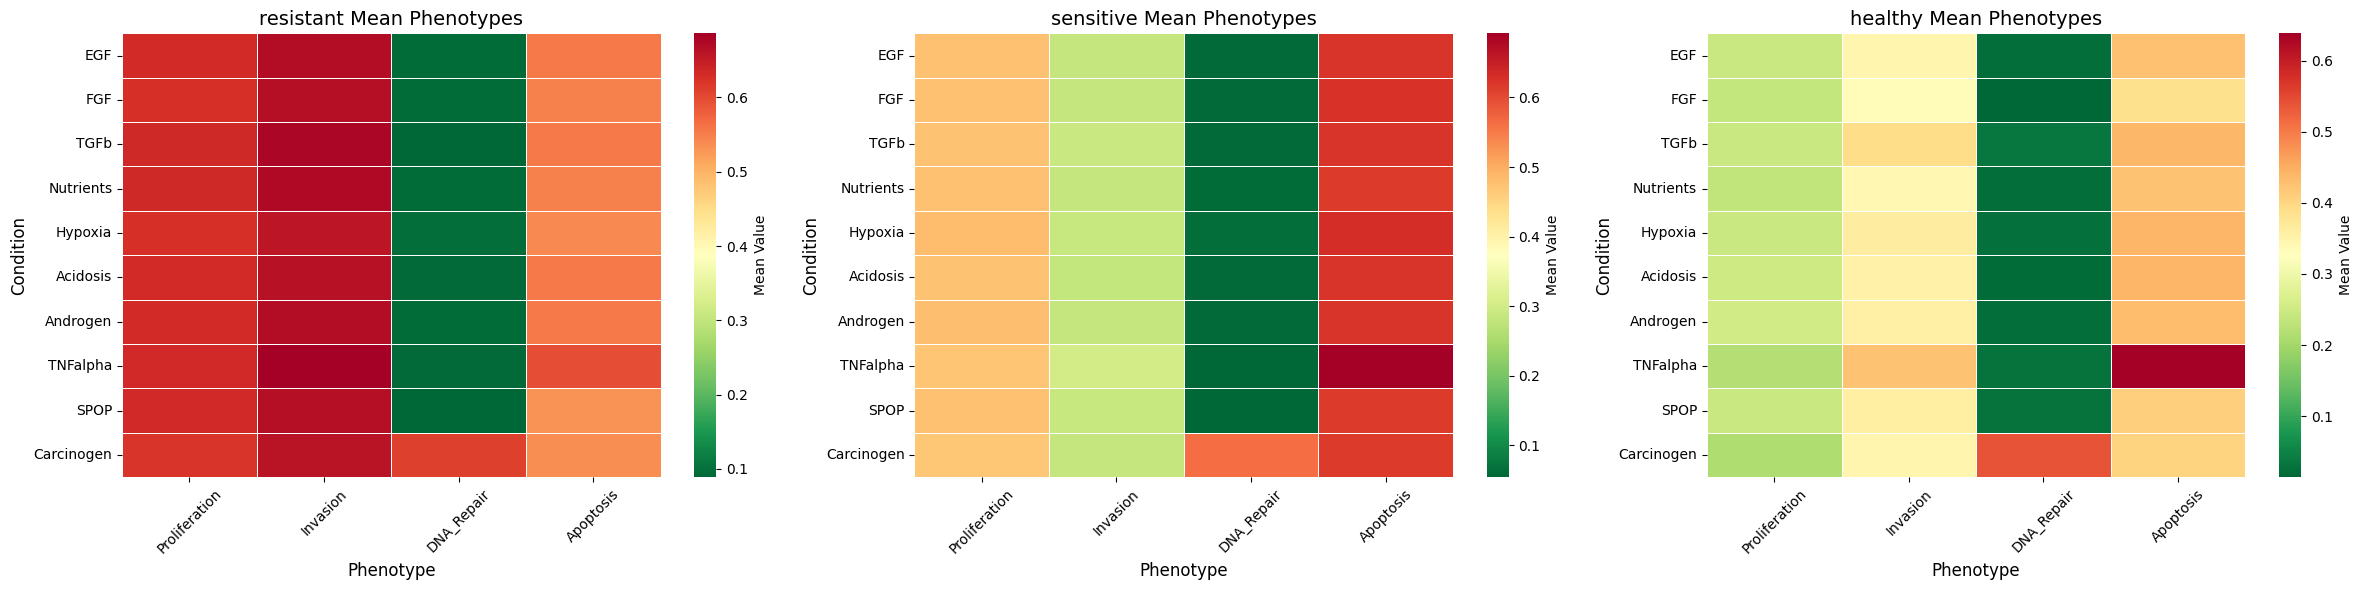

['SIDM00360', 'SIDM00957', 'SIDM00956', 'SIDM00834', 'SIDM00835', 'SIDM01078', 'SIDM00763', 'SIDM00415', 'SIDM00832', 'SIDM00562', 'SIDM01085', 'SIDM00713', 'SIDM00506', 'SIDM00507', 'SIDM00881', 'SIDM00700', 'SIDM00338', 'SIDM00448', 'SIDM00861', 'SIDM00524', 'SIDM00282', 'SIDM00255', 'SIDM00523', 'SIDM00253', 'SIDM00194', 'SIDM00547', 'SIDM00744', 'SIDM01116', 'SIDM00223', 'SIDM00579', 'SIDM00150', 'SIDM00556', 'SIDM00769', 'SIDM00796', 'SIDM01107', 'SIDM01042', 'SIDM00412', 'SIDM00406', 'SIDM00407', 'SIDM00388', 'SIDM01109', 'SIDM00404', 'SIDM01086', 'SIDM00403', 'SIDM00364', 'SIDM00854', 'SIDM00459', 'SIDM00289', 'SIDM00671', 'SIDM00305', 'SIDM00449', 'SIDM00646', 'SIDM00450', 'SIDM01148', 'SIDM00530', 'SIDM00901', 'SIDM00447', 'SIDM00244', 'SIDM01013', 'SIDM00482', 'SIDM01005', 'SIDM00290', 'SIDM01038', 'SIDM00426', 'SIDM01076', 'SIDM00425', 'SIDM00145', 'SIDM00435', 'SIDM00540', 'SIDM01265']
Saved final phenotype table to: analysis/Pictilisib/downstream_analysis/CTNNB1_CCND1_KO_t

In [8]:
# for each input ON at a time 
downstream_analysis(folder_results,folder_models, drug_interest, top_resistant_ids, top_sensitive_ids, top_healthy_ids, patients_categ, inputs_list, phenotype_interest, annotations_models, intervention_gene = genes_to_test, list_active_inputs = None
)


In [ ]:
# downstream analysis - CTNNB1 knockout 

res_values_knockout_ctnnb1 = pd.read_csv('analysis/Refametinib/downstream_analysis/CTNNB1_KO_target_block/genes_models/results/resistant/combined_results.csv', index_col = 0)
sens_values_knockout_ctnnb1 = pd.read_csv('analysis/Refametinib/downstream_analysis/CTNNB1_KO_target_block/genes_models/results/sensitive/combined_results.csv', index_col = 0)


# before KO 
res_values = pd.read_csv('analysis/Refametinib/genes_models/MEK1_MEK2_target_block/results/resistant/combined_results.csv', index_col = 0)
sens_values = pd.read_csv('analysis/Refametinib/genes_models/MEK1_MEK2_target_block/results/sensitive/combined_results.csv', index_col = 0)


In [ ]:
import ast

res_values_knockout_ctnnb1 = res_values_knockout_ctnnb1.applymap(ast.literal_eval)
sens_values_knockout_ctnnb1 = sens_values_knockout_ctnnb1.applymap(ast.literal_eval)

res_values = res_values.applymap(ast.literal_eval)
sens_values = sens_values.applymap(ast.literal_eval)

In [ ]:
res_values_knockout = res_values_knockout_ctnnb1.loc['EGF', 'INVASION']
res_values = res_values.loc['EGF', 'INVASION']


sens_values_knockout = sens_values_knockout_ctnnb1.loc['EGF', 'INVASION']
sens_values = sens_values.loc['EGF', 'INVASION']

In [ ]:
mean_mean_sens_ko = sum(sens_values_knockout) / len(sens_values_knockout)
mean_sens = sum(sens_values) / len(sens_values)


In [ ]:
# stats test 
from scipy.stats import mannwhitneyu


stat, p_value = mannwhitneyu(sens_values_knockout, sens_values, alternative='two-sided')

print("Mann–Whitney U statistic:", stat)
print("p-value:", p_value)

In [ ]:
mean_res_ko = sum(res_values_knockout) / len(res_values_knockout)
mean_res = sum(res_values) / len(res_values)


In [ ]:
mean_res_ko

In [ ]:
mean_res

Results 
- sensitive -> significant difference between the two populations (0.0001)
- resistant -> not significant (0.09)

In [ ]:
with open('analysis/Refametinib/top_resistant_ids.txt', 'r') as file:
    res_ids = file.read().splitlines()  # returns a list of names (one per line)

with open('analysis/Refametinib/top_sensitive_ids.txt', 'r') as file:
    sens_ids = file.read().splitlines()


In [ ]:
mutations_data = pd.read_csv('data/cellmodel_data/mutations_all_20250318.csv')


In [ ]:
'pi3k' in [gene.lower() for gene in set(mutations_data['gene_symbol'])]


In [ ]:
res_mut = mutations_data[
    (mutations_data['model_id'].isin(res_ids)) &
    (mutations_data['gene_symbol'] == 'KRAS')
]

sens_mut = mutations_data[
    (mutations_data['model_id'].isin(sens_ids)) &
    (mutations_data['gene_symbol'] == 'KRAS')
]


print('res mutations:', res_mut['effect'].value_counts())
print('sens mutations:', sens_mut['effect'].value_counts())